<a href="https://colab.research.google.com/github/Suryacant/Capstone1/blob/main/CNN_Cat_%26_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fist switch run time to GPU because normal CPU will take a long time to test & traim model

In [8]:
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/ # initially path was incomplete--> !cp kaggle.json ~/.kaggle/ # had to add / in front of kaggle.. i understood that when i copied the path and pasted to see what does it look like


In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [10]:
# Unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
# Librerys we need
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout # BatchNormalization,Dropout are added to reduce over fitting

In [12]:
# generators are needed to process all the images in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', # int - so that cat gets 0 and dog gets 1
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize - It is  done to make numpy arry value from 0 to 1 instead of 255 which is by default
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 104ms/step - loss: 1.0248 - accuracy: 0.6144 - val_loss: 0.9120 - val_accuracy: 0.5168
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5319 - accuracy: 0.7376 - val_loss: 0.5561 - val_accuracy: 0.7406
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4595 - accuracy: 0.7900 - val_loss: 0.4734 - val_accuracy: 0.7720
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4079 - accuracy: 0.8187 - val_loss: 0.6180 - val_accuracy: 0.7294
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3232 - accuracy: 0.8559 - val_loss: 0.7029 - val_accuracy: 0.6664
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2496 - accuracy: 0.8978 - val_loss: 0.6776 - val_accuracy: 0.7150
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1662 - accuracy: 0.9347 - val_loss: 0.5976 - val_ac

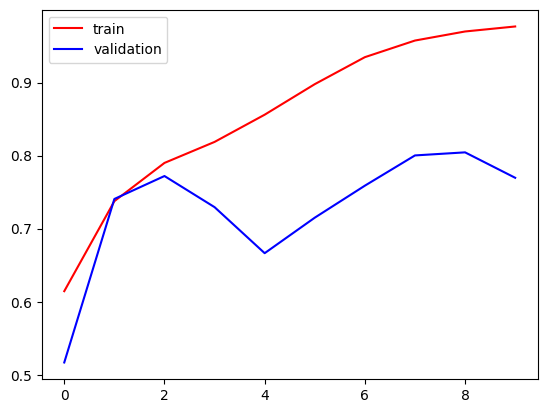

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

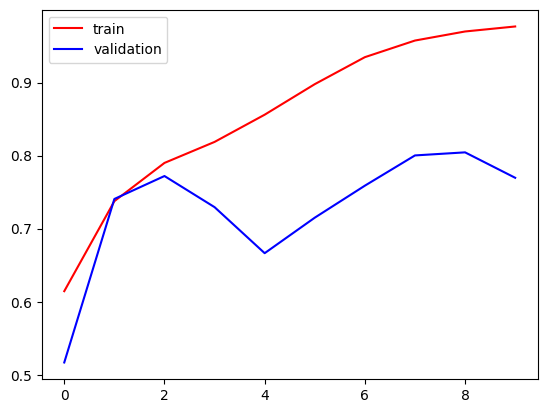

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

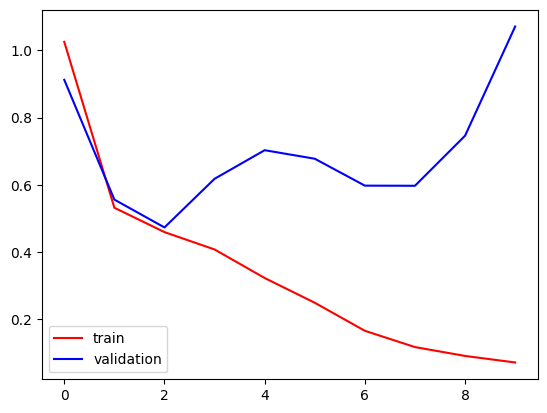

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

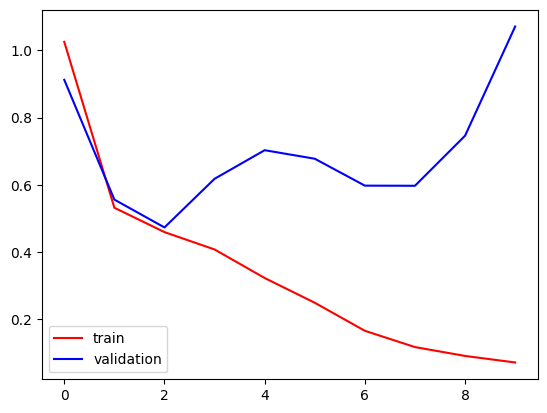

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout - used
# Batch Norm - used
# Reduce complexity

In [23]:
import cv2 # to test our model with a new image

In [32]:
test_img = cv2.imread('/photo-1611003228941-98852ba62227.jpg')

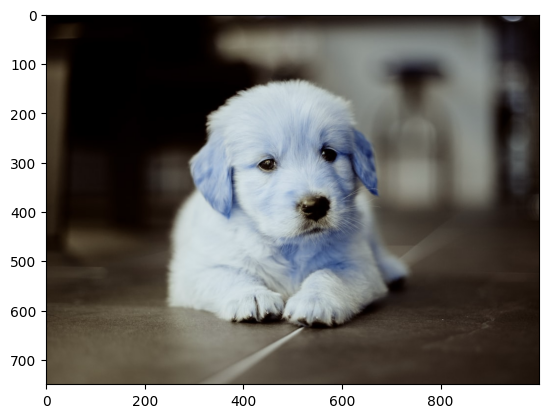

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(750, 1000, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

Failing the test


In [ ]:
Failing the test